#### Bu veriseti seaborn kütüphanesinde mevcuttur.

In [1]:
import seaborn as sns
import numpy as np

In [2]:
iris = sns.load_dataset('iris')

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#### Aynı zamanda scikit-learn kütüphanesinden de çekebiliriz.

In [4]:
from sklearn.datasets import load_iris
skl_iris = load_iris()

In [5]:
print(skl_iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [6]:
#Buradaki DESCR, verideki özet bilgiyi gösterir. O sütunu çağırıp bilgileri görelim.

In [7]:
print(skl_iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [8]:
print(skl_iris['data'][:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


#### Fakat biz seaborn kütüphanesinden çektiğimiz iris veriseti ile devam edeceğiz.

#### Çünkü scikit-learn'deki iris veriseti Numpy dizisi ile tutuluyorken seaborn'deki iris veriseti Pandas DataFrame'i ile tutuluyor.

#### Görünüş açısından seaborn'deki veriseti daha okunaklı olduğu için ve veri ön işleme adımları daha kolay olduğu için onu tercih ediyoruz.

In [9]:
X_iris = iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [10]:
y_iris = iris['species']
y_iris.shape

(150,)

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_egitim, X_test, y_egitim, y_test = train_test_split(X_iris, y_iris, random_state = 1)

#Train-Test yüzdesini belirlemediğimiz için otomatik olarak %75 ile %25 olarak ayırdı.

In [13]:
print(X_egitim.shape)
print(y_egitim.shape)

(112, 4)
(112,)


In [14]:
print(X_test.shape)
print(y_test.shape)

(38, 4)
(38,)


In [15]:
# Verileri görselleştirmek için scatter_matrix fonksiyonunu kullanacağız.

In [16]:
from pandas.plotting import scatter_matrix

In [17]:
%matplotlib inline

In [18]:
# scatter_matrix fonksiyonunda renklendirme yapmak için "y_egitim" değişkenini kullanmalıyız.
# Fakat "y_egitim" bir DataFrame olduğu için ve metinsel olduğu için onu önce listeye çevirip
# sonra sayısal formata çevirmeliyiz.

In [19]:
y_egitim_listesi = y_egitim
y_egitim_listesi = list(y_egitim_listesi)
y_egitim_listesi[:5]

['versicolor', 'virginica', 'virginica', 'setosa', 'virginica']

In [20]:
for i in y_egitim_listesi:
    if i == 'setosa':
        i = 0
        y_egitim_listesi.append(i)
    if i == 'versicolor':
        i = 1
        y_egitim_listesi.append(i)
    if i == 'virginica':
        i = 2
        y_egitim_listesi.append(i)
y_egitim_listesi = y_egitim_listesi[112:224]
y_egitim_listesi[:5]

[1, 2, 2, 0, 2]

In [21]:
# Görüldüğü üzere verileri sayısal formata çevirmiş olduk.
# Şimdi scatter_matrix fonksiyonuna bu değişkeni kullanabiliriz.

array([[<AxesSubplot:xlabel='sepal_length', ylabel='sepal_length'>,
        <AxesSubplot:xlabel='sepal_width', ylabel='sepal_length'>,
        <AxesSubplot:xlabel='petal_length', ylabel='sepal_length'>,
        <AxesSubplot:xlabel='petal_width', ylabel='sepal_length'>],
       [<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>,
        <AxesSubplot:xlabel='sepal_width', ylabel='sepal_width'>,
        <AxesSubplot:xlabel='petal_length', ylabel='sepal_width'>,
        <AxesSubplot:xlabel='petal_width', ylabel='sepal_width'>],
       [<AxesSubplot:xlabel='sepal_length', ylabel='petal_length'>,
        <AxesSubplot:xlabel='sepal_width', ylabel='petal_length'>,
        <AxesSubplot:xlabel='petal_length', ylabel='petal_length'>,
        <AxesSubplot:xlabel='petal_width', ylabel='petal_length'>],
       [<AxesSubplot:xlabel='sepal_length', ylabel='petal_width'>,
        <AxesSubplot:xlabel='sepal_width', ylabel='petal_width'>,
        <AxesSubplot:xlabel='petal_length', ylabel='petal_

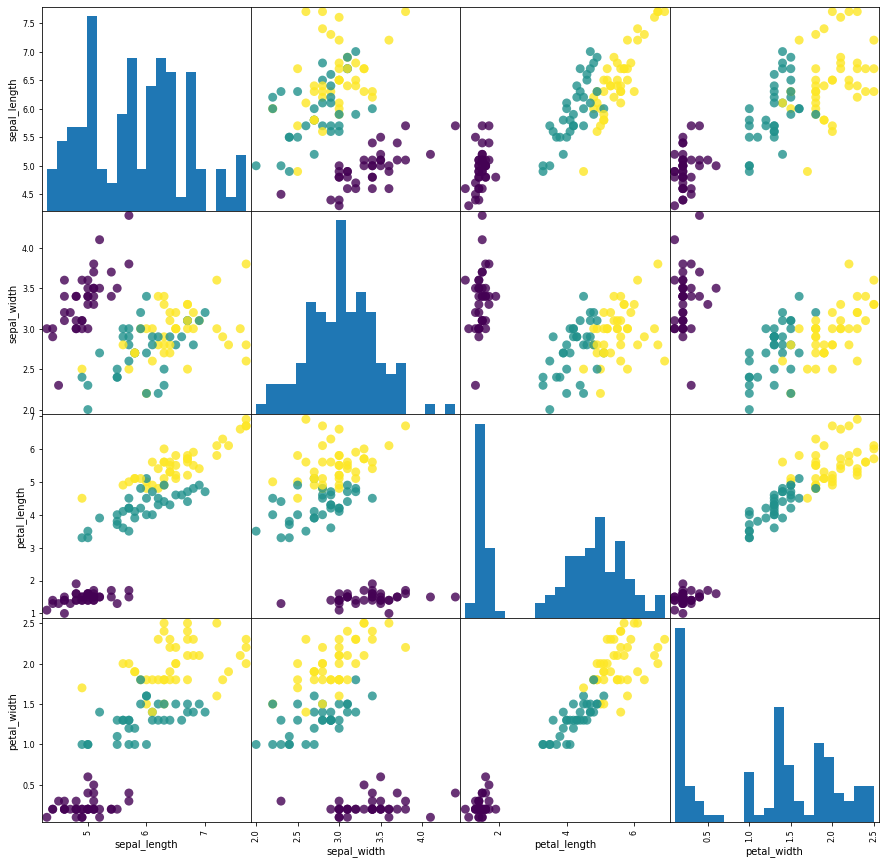

In [22]:
scatter_matrix(X_egitim, c=y_egitim_listesi, figsize=(15,15), marker='o', hist_kwds={'bins':20},
               s=80, alpha=0.8)

#### K-En Yakın Komşu Algoritması

In [23]:
from sklearn.neighbors import KNeighborsClassifier

In [24]:
knn_model = KNeighborsClassifier(n_neighbors = 1)

In [25]:
knn_model.fit(X_egitim, y_egitim)

KNeighborsClassifier(n_neighbors=1)

In [26]:
X_yeni = np.array([[5, 2.9, 1, 0.2]])
X_yeni.shape

(1, 4)

In [27]:
tahmin = knn_model.predict(X_yeni)
print(tahmin)

['setosa']


In [28]:
y_tahmin = knn_model.predict(X_test)
print(y_tahmin)

['setosa' 'versicolor' 'versicolor' 'setosa' 'virginica' 'versicolor'
 'virginica' 'setosa' 'setosa' 'virginica' 'versicolor' 'setosa'
 'virginica' 'versicolor' 'versicolor' 'setosa' 'versicolor' 'versicolor'
 'setosa' 'setosa' 'versicolor' 'versicolor' 'versicolor' 'setosa'
 'virginica' 'versicolor' 'setosa' 'setosa' 'versicolor' 'virginica'
 'versicolor' 'virginica' 'versicolor' 'virginica' 'virginica' 'setosa'
 'versicolor' 'setosa']


In [29]:
knn_model.score(X_test, y_test)

1.0

#### %100 doğrulukla tahmin edebiliyor.

#### 4. Video

#### GaussianNB Algoritması

In [30]:
from sklearn.naive_bayes import GaussianNB

In [31]:
gauss_model = GaussianNB()

In [32]:
gauss_model.fit(X_egitim, y_egitim)

GaussianNB()

In [33]:
y_model = gauss_model.predict(X_test)

In [34]:
from sklearn.metrics import accuracy_score

In [35]:
accuracy_score(y_test, y_model)

0.9736842105263158

#### Görüldüğü üzere model %97 oranda doğru sonuç vermektedir.